#### Задание 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [34]:
X = pd.DataFrame(data, columns=feature_names)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [21]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [22]:
X_train_tsne.shape

(404, 2)

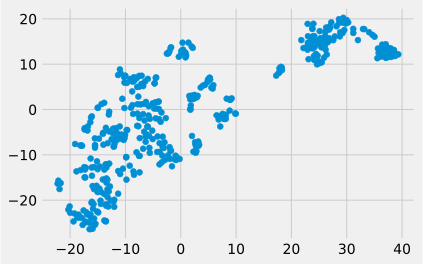

In [63]:
plt.pyplot.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.style.use('fivethirtyeight')

#### Задание 2

In [75]:
from sklearn.cluster import KMeans

In [108]:
model = KMeans(n_clusters=3, random_state = 42, max_iter=100)

In [109]:
labels_train = model.fit_predict(X_train_scaled)

In [110]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

In [111]:
labels_train = model.fit_predict(X_train_scaled)

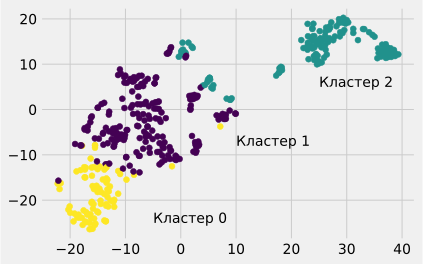

In [112]:
plt.pyplot.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.pyplot.text(-5 , -25, 'Кластер 0')
plt.pyplot.text(10 , -8, 'Кластер 1')
plt.pyplot.text(25 , 5, 'Кластер 2')
plt.style.use('fivethirtyeight')

In [113]:
y_train.mean()

price    22.796535
dtype: float64

In [114]:
y_train[labels_train==0].mean()

price    24.958115
dtype: float64

In [115]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [116]:
y_train[labels_train==2].mean()

price    27.788372
dtype: float64

In [117]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.42166020942408367

In [118]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [119]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.07356558139534886

#### Задание 3

In [120]:
labels_test = model.fit_predict(X_test_scaled)

In [121]:
pd.value_counts(labels_test)

1    55
0    38
2     9
dtype: int64

In [122]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne

array([[-8.46654475e-02, -9.09478855e+00],
       [-4.06562519e+00, -4.91367960e+00],
       [ 4.35094738e+00, -5.12193918e+00],
       [-3.68255186e+00, -8.59845257e+00],
       [ 6.02345276e+00, -3.11294389e+00],
       [-1.08000350e+00, -7.69099951e+00],
       [ 1.08789079e-01, -6.97110081e+00],
       [ 3.51543427e+00, -5.58331394e+00],
       [ 5.13430929e+00, -3.08600760e+00],
       [ 8.50572467e-01, -7.26510954e+00],
       [-3.22340894e+00, -4.16470432e+00],
       [-1.24080908e+00, -6.46513128e+00],
       [ 9.07792950e+00, -4.16818953e+00],
       [-1.87813437e+00, -7.94151115e+00],
       [-6.47770286e-01, -7.80586672e+00],
       [ 5.15666771e+00, -2.47492075e+00],
       [ 2.78150916e+00, -6.31367159e+00],
       [ 7.45066547e+00, -4.44129801e+00],
       [-5.84655952e+00, -1.17684040e+01],
       [ 6.36432076e+00, -3.16007757e+00],
       [-3.66662216e+00, -9.50389099e+00],
       [-4.05184031e+00, -1.02018156e+01],
       [ 6.37586892e-01, -6.13795137e+00],
       [ 1.

In [123]:
X_test_tsne.shape

(102, 2)

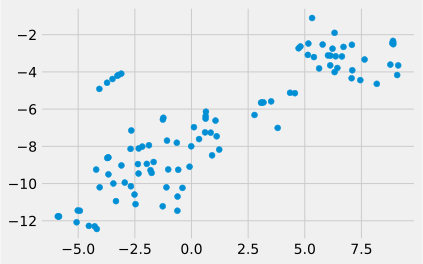

In [124]:
plt.pyplot.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.style.use('fivethirtyeight')

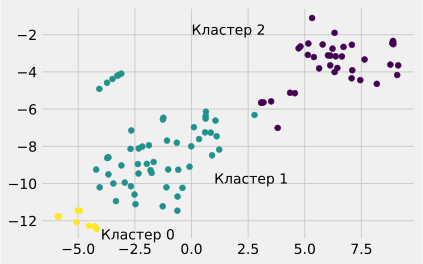

In [125]:
plt.pyplot.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.pyplot.text(-4 , -13, 'Кластер 0')
plt.pyplot.text(1 , -10, 'Кластер 1')
plt.pyplot.text(0 , -2, 'Кластер 2')
plt.style.use('fivethirtyeight')

In [126]:
y_test.mean()

price    21.488235
dtype: float64

In [127]:
y_test[labels_test==0].mean()

price    16.710526
dtype: float64

In [128]:
y_test[labels_test==1].mean()

price    22.690909
dtype: float64

In [129]:
y_test[labels_test==2].mean()

price    34.311111
dtype: float64

In [130]:
X_test.loc[labels_test==0, 'CRIM'].mean()

9.419181842105264

In [131]:
X_test.loc[labels_test==1, 'CRIM'].mean()

0.21929690909090907

In [132]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.04070333333333334